# Dictionary vector space tutorial
In this tutorial you will learn:


- How to construct a vector space using a snapshot data tensor

## Modules
Here are the relevant modules for this example.

In [2]:
%%capture
import romtools
import numpy as np
from matplotlib import pyplot as plt
from romtools import vector_space

[s1067086ca:13230] shmem: mmap: an error occurred while determining whether or not /var/folders/cl/5gkmlky11v3_hw7tzm3l_y6h003hgz/T//ompi.s1067086ca.115199/jf.0/528023552/sm_segment.s1067086ca.115199.1f790000.0 could be created.


## Snapshots
First, we load in snapshots from a FOM. We use pre-computed snapshots of the [1D Euler equations](https://pressio.github.io/pressio-demoapps/euler_1d_smooth.html) obtained using pressio-demo-apps.

In [3]:
snapshots = np.load('snapshots.npz')['snapshots']

## The snapshots are in tensor form:
n_vars, nx, nt = snapshots.shape

Note that romtools works with [tensor forms](https://pressio.github.io/rom-tools-and-workflows/romtools/vector_space.html). Let's look at the first density snapshot.

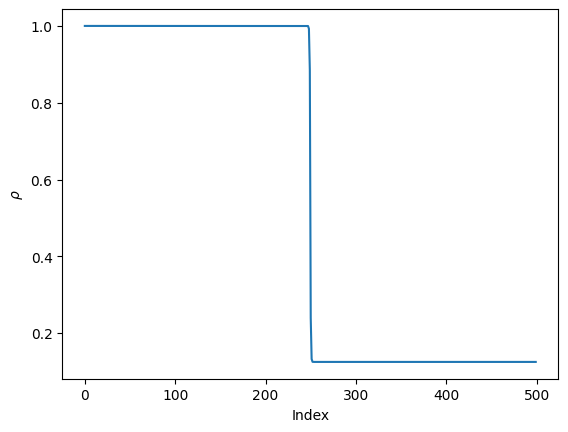

In [4]:

plt.plot(snapshots[0,:,0])
plt.xlabel(r'Index')
plt.ylabel(r'$\rho$')
plt.show()

## Basis Creation
Next, we make a dictionary basis (with no truncation) that uses the first vector as an affine offset.

First, we create a ["shifter"](https://pressio.github.io/rom-tools-and-workflows/romtools/vector_space/utils/shifter.html) that is responsible for shifting snapshots.

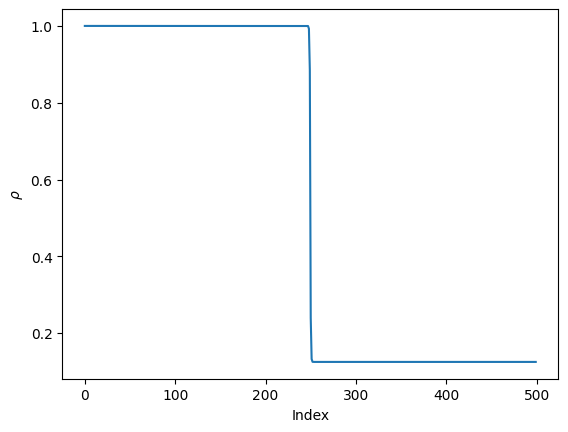

In [5]:
my_shifter = vector_space.utils.create_firstvec_shifter(snapshots)

#We can look at the shift vector if we want:
shift_vec = my_shifter.get_shift_vector()
plt.plot(shift_vec[0])
plt.xlabel(r'Index')
plt.ylabel(r'$\rho$')
plt.show()

We then construct an affine vector space using this defined shifter. We don't use the first snapshot in the vector space since this is the affine offset.

In [6]:
my_affine_vector_space = vector_space.DictionaryVectorSpace(snapshots[...,1::],shifter=my_shifter)

We do not do a deep copy of the snapshot matrix for performance reasons. Once a snapshot tensor is passed, we modify the data in place. 

### Aside: No Affine Offset
What if you didn't want an affine offset? The `VectorSpace` definition would simply be defined as:

In [7]:
my_vector_space = vector_space.DictionaryVectorSpace(snapshots)

### Viewing the Basis
Now, let us view the first basis mode for density.

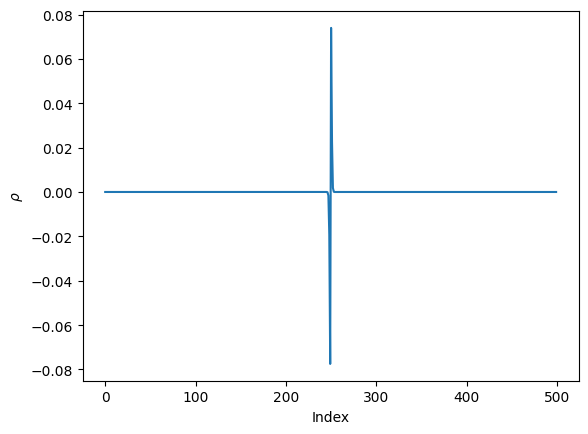

In [8]:
#We can view the basis and shift vector:
basis = my_affine_vector_space.get_basis()
shift_vector = my_affine_vector_space.get_shift_vector()

#We can look at the density component of the first basis:
plt.plot(basis[0,:,0])
plt.xlabel(r'Index')
plt.ylabel(r'$\rho$')
plt.show()